# Comprehensive Evaluation of Machine Learning Models on Diamond Dataset

Author: Muhammad Musab

### Introduction
The primary objective of this notebook is to conduct evaluation of various machine learning models both regression and classification to identify the most accurate algorithm for predicting the target variable. The evaluation will culminate in the selection of the best model for the given dataset.<br>

### Goals
- To compare a range of machine learning algorithms for bot regression and classification tasks.
- To select the best model based on performance metrics.
- To apply the chosen model to dummy data for prediction validation.

### Algorithms Evaluated
In my exploration I will evaluate the following machine learning algorithms:
- Linear Regression
- Logistic Regression
- Decision Tree
- Random Forest
- Support Vector Machine
- K-Nearest Neighbors
- XGBoost

### Dataset Overview
The dataset used in this evaluation is a collection of diamond attributes and their corresponding prices. The dataset contains 53940 rows and 10 columns. The columns represent the following features:
- **carat**: The weight of the diamond in carats.
- **cut**: The quality of the diamond's cut.
- **color**: The color of the diamond.
- **clarity**: The clarity of the diamond.
- **depth**: The depth of the diamond.
- **table**: The table of the diamond.
- **x**: The length of the diamond in millimeters.
- **y**: The width of the diamond in millimeters.
- **z**: The depth of the diamond in millimeters.
- **price**: The price of the diamond in US dollars.

### Data Preprocessing
Before training the models, the dataset needs to be cleaned and preprocessed. This includes handling missing values, encoding categorical variables, and scaling numerical features.

### Acknowledgements
This notebook is based on a comprehensive evaluation of machine learning models on the diamond dataset by [Muhammad Musab](https://github.com/MuhammadMusab).

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder, QuantileTransformer, FunctionTransformer 
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier, GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, accuracy_score, classification_report, confusion_matrix, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score
from xgboost import XGBRegressor, XGBClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, BernoulliNB
import pickle

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = sns.load_dataset('diamonds')
df.shape

(53940, 10)

In [4]:
# Load Diamond Dataset and select only 1000 rows and random_state=42 make sure to get the same results
df = sns.load_dataset('diamonds').sample(n=10000, random_state=42)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1388,0.24,Ideal,G,VVS1,62.1,56.0,559,3.97,4.00,2.47
50052,0.58,Very Good,F,VVS2,60.0,57.0,2201,5.44,5.42,3.26
41645,0.40,Ideal,E,VVS2,62.1,55.0,1238,4.76,4.74,2.95
42377,0.43,Premium,E,VVS2,60.8,57.0,1304,4.92,4.89,2.98
17244,1.55,Ideal,E,SI2,62.3,55.0,6901,7.44,7.37,4.61


### 1. Data Pre-Processing

### 1.1 Shape Inspection

In [5]:
def heading(title):
    print(f"{'=' * len(title)}")
    print(f"{title.upper()}")
    print(f"{'=' * len(title)}")

    # def heading(title):
    # print(f"\n{'=' * len(title)}\n{title.upper()}\n{'=' * len(title)}\n")


heading('Data Pre-Processing')
print(f"Total entries: {df.shape[0]}")
print(f"Total columns: {df.shape[1]}")

DATA PRE-PROCESSING
Total entries: 10000
Total columns: 10


### 1.2 Dataset Structure(Information)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1388 to 42497
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    10000 non-null  float64 
 1   cut      10000 non-null  category
 2   color    10000 non-null  category
 3   clarity  10000 non-null  category
 4   depth    10000 non-null  float64 
 5   table    10000 non-null  float64 
 6   price    10000 non-null  int64   
 7   x        10000 non-null  float64 
 8   y        10000 non-null  float64 
 9   z        10000 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 655.2 KB


In [7]:
for i in df.columns:
    print(f"{i}: {df[i].dtype}")

carat: float64
cut: category
color: category
clarity: category
depth: float64
table: float64
price: int64
x: float64
y: float64
z: float64


### 1.3 Data Summary

Method 1

In [8]:
def count_column_types(df):
    categorical_count = df.select_dtypes(include=['category']).shape[1]
    object_count = df.select_dtypes(include=['object']).shape[1]
    float_count = df.select_dtypes(include=['float64']).shape[1]
    integer_count = df.select_dtypes(include=['int64']).shape[1]
    
    print(f'Categorical Columns: {categorical_count}')
    print(f'Object Columns: {object_count}')
    print(f'Float Columns: {float_count}')
    print(f'Integer Columns: {integer_count}')

heading('Column Types')
count_column_types(df)



COLUMN TYPES
Categorical Columns: 3
Object Columns: 0
Float Columns: 6
Integer Columns: 1


Method 2

In [9]:
def count_column_types(df):
    categorical_count = len(df.select_dtypes(include=['category']).columns)
    object_count = len(df.select_dtypes(include=['object']).columns)
    float_count = len(df.select_dtypes(include=['float64']).columns)
    integer_count = len(df.select_dtypes(include=['int64']).columns)
    
    print(f'Categorical Columns: {categorical_count}')
    print(f'Object Columns: {object_count}')
    print(f'Float Columns: {float_count}')
    print(f'Integer Columns: {integer_count}')

heading('Column Types')
count_column_types(df)



COLUMN TYPES
Categorical Columns: 3
Object Columns: 0
Float Columns: 6
Integer Columns: 1


Method 3

In [10]:
categorical_count = len(df.select_dtypes(include=['category']).columns)
object_count = len(df.select_dtypes(include=['object']).columns)
float_count = len(df.select_dtypes(include=['float64']).columns)
integer_count = len(df.select_dtypes(include=['int64']).columns)

heading('Column Types')
print(f'Categorical Columns: {categorical_count}')
print(f'Object Columns: {object_count}')
print(f'Float Columns: {float_count}')
print(f'Integer Columns: {integer_count}')

COLUMN TYPES
Categorical Columns: 3
Object Columns: 0
Float Columns: 6
Integer Columns: 1


### 1.4 Diamond Dataset Features
Change the name of the columns x, y and z to x_width, y_width and z_depth

In [11]:
# renaming the x, y and z columns
df.rename(columns={'x': 'x_width', 'y': 'y_width', 'z': 'z_depth'}, inplace=True)
# df.head()

# printing the new column name's list using loop
heading('Updated Column Names')
for cols in df.columns:
    print("- " + cols)

UPDATED COLUMN NAMES
- carat
- cut
- color
- clarity
- depth
- table
- price
- x_width
- y_width
- z_depth


### 1.5 Summary Statistics

In [12]:
df.describe()

,carat,depth,table,price,x_width,y_width,z_depth
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.795464,61.77341,57.447340,3900.356600,5.722033,5.723494,3.534455
std,0.476937,1.45393,2.255054,3992.251932,1.128186,1.120839,0.696424
min,0.200000,43.00000,49.000000,335.000000,0.000000,0.000000,0.000000
25%,0.400000,61.10000,56.000000,929.750000,4.690000,4.700000,2.900000
50%,0.700000,61.90000,57.000000,2385.500000,5.690000,5.700000,3.520000
75%,1.040000,62.50000,59.000000,5235.250000,6.530000,6.530000,4.030000
max,4.010000,79.00000,73.000000,18823.000000,10.140000,10.100000,6.310000


### 1.5.1 Observation Statistics

In [13]:
heading('Descriptive Statistics')

# print the summary statistics dynmically
print(f"""
1. The dataset consists of {df.shape[0]} entries and {df.shape[1]} columns.
2. The dataset has {categorical_count} categorical columns, {object_count} object columns, {float_count} float columns and {integer_count} integer columns.
3. The dataset has {df.isnull().sum().sum()} missing values.
4. The dataset has {df.duplicated().sum()} duplicate rows.
5. The dataset has {df.columns.duplicated().sum()} duplicate columns.
""")

DESCRIPTIVE STATISTICS

1. The dataset consists of 10000 entries and 10 columns.
2. The dataset has 3 categorical columns, 0 object columns, 6 float columns and 1 integer columns.
3. The dataset has 0 missing values.
4. The dataset has 5 duplicate rows.
5. The dataset has 0 duplicate columns.



### 1.6 Correlation Matrix

#### 1.6.1 Ordinal Categorical Variables and Encoding Methods
As Diamond Dataset have a categorical columns so, we need to encode variables. We will use Label Encoding rather than One-Hot Encoding because Label Encoding is better for ordinal data.

1. **`Label Encoding`** is better for ordinal data, where there is a clear ranking or order of categories (e.g., Low < Medium < High)

2. **`One-Hot Encoding`** is better for nominal data, where there is no order or rank between categories (e.g., Cat, Dog, Rabbit).

Summary:
* **`Ordinal data`** means that the values have a **natural order**, but the differences between them are not uniform or directly measurable (i.e., "Fair" < "Good" < "Very Good").
* In the diamond dataset, columns like `cut`, `color` and `clarity` are ordinal because they reflect ordered categories of quality.
* Label Encoding is a good approach for encoding these ordinal features, as it preserves the order (e.g., Fair < Good < Very Good).

In [14]:
# encoding the categorical or object variable using for loop
for i in df.columns:
    if df[i].dtype == 'object' or df[i].dtype.name == 'category':
        df[i] = LabelEncoder().fit_transform(df[i])

df.head()

,carat,cut,color,clarity,depth,table,price,x_width,y_width,z_depth
1388,0.24,2,3,6,62.1,56.0,559,3.97,4.00,2.47
50052,0.58,4,2,7,60.0,57.0,2201,5.44,5.42,3.26
41645,0.40,2,1,7,62.1,55.0,1238,4.76,4.74,2.95
42377,0.43,3,1,7,60.8,57.0,1304,4.92,4.89,2.98
17244,1.55,2,1,3,62.3,55.0,6901,7.44,7.37,4.61


#### 1.6.2 Correlation Matrix

CORRELATION MATRIX


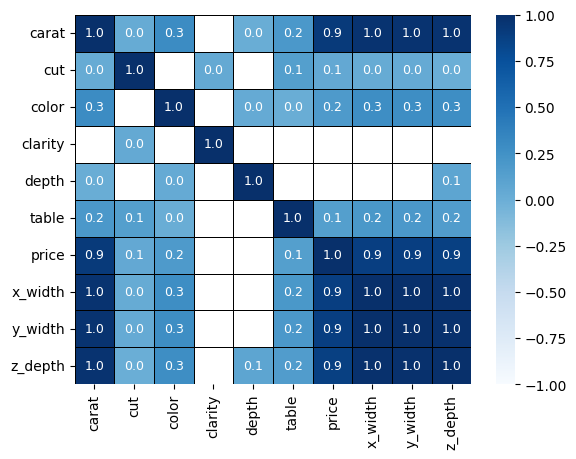

In [15]:
heading('Correlation Matrix')
corr = df.corr()

# plot the correlation matrix
sns.heatmap(
    corr, # dataframe
    annot=True, # show the correlation values
    fmt='.1f', # format of the correlation values
    cmap='Blues', # color palette
    linewidths=0.5, # width of the lines
    linecolor='black', # color of the lines
    mask=corr < 0, # mask the lower triangle
    annot_kws={"size": 9}, # font size of the correlation values
    vmin=-1, # minimum value of the color palette
    vmax=1, # maximum value of the color palette
    )
plt.show()

#### 1.6.3 Heatmap Observations
According to the heatmap, we can say that `x_width`, `y_width` and `z_depth` are the most important features for prediction.

### 1.7 Missing Values Inspection

#### 1.7.1 Heatmap

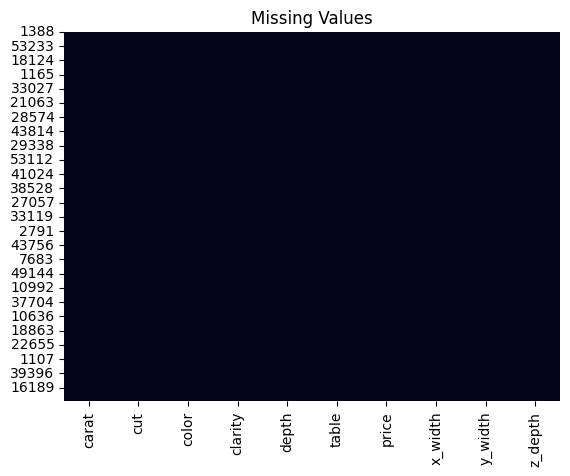

In [16]:
# heatmap for missig values
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values')
plt.show()

#### 1.7.2 Observations
There are no missing values in the dataset.

### 1.8 Data Distribution Analysis

#### 1.8.1 Visualizationi of Data

In [17]:

skewness = df.select_dtypes(include=['int64', 'float64']).skew()

# Convert the skewness series into a DataFrame and transpose it
skewness_df = pd.DataFrame(skewness).T  # T transposes the series into a row

# Name the row index
skewness_df.index = ['skewness']

# Display the skewness DataFrame
skewness_df


,carat,depth,table,price,x_width,y_width,z_depth
skewness,1.143019,-0.073058,0.770793,1.652864,0.3976,0.392881,0.389912


In [18]:
numerica_cols = df.select_dtypes(include=['int64', 'float64']).columns
skewness = df[numerica_cols].skew()

heading('Skewness')
# skewness = pd.DataFrame(skewness)
skewness = pd.DataFrame([skewness], index=['skewness'])
skewness

SKEWNESS


,carat,depth,table,price,x_width,y_width,z_depth
skewness,1.143019,-0.073058,0.770793,1.652864,0.3976,0.392881,0.389912


#### 1.8.2 Plotting Distribution

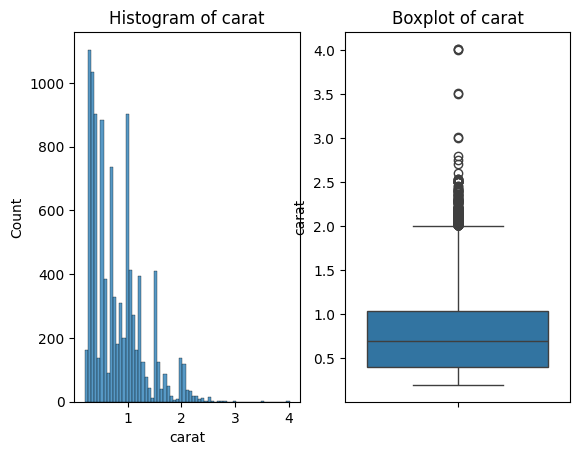

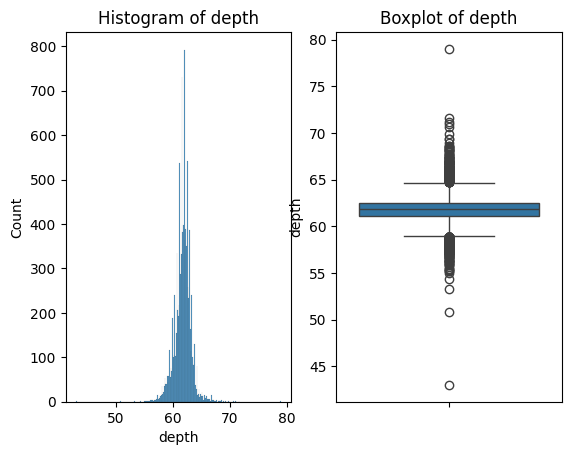

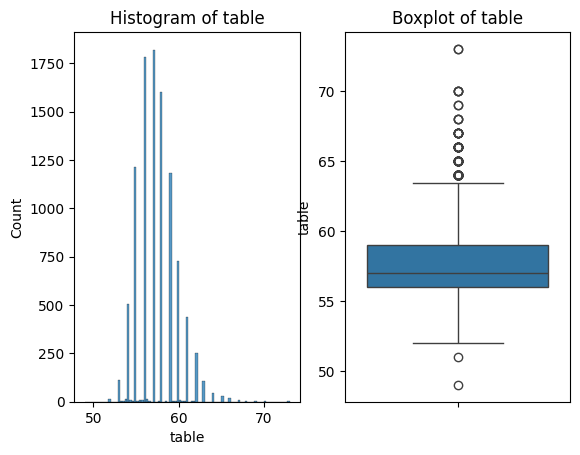

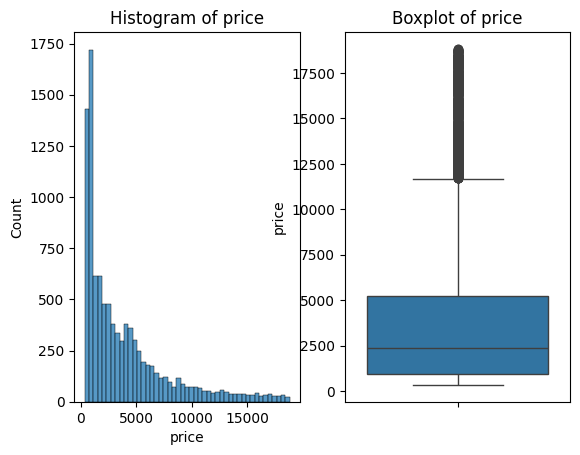

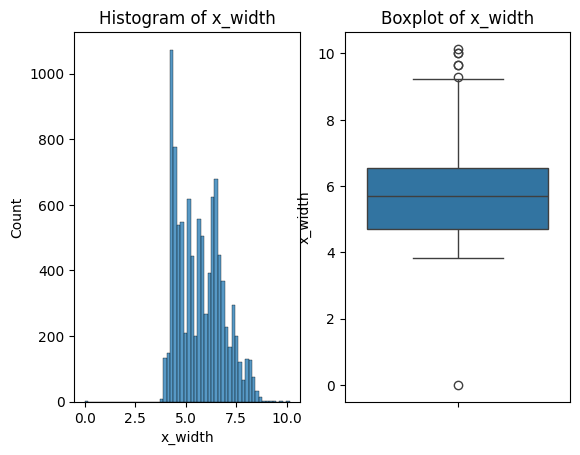

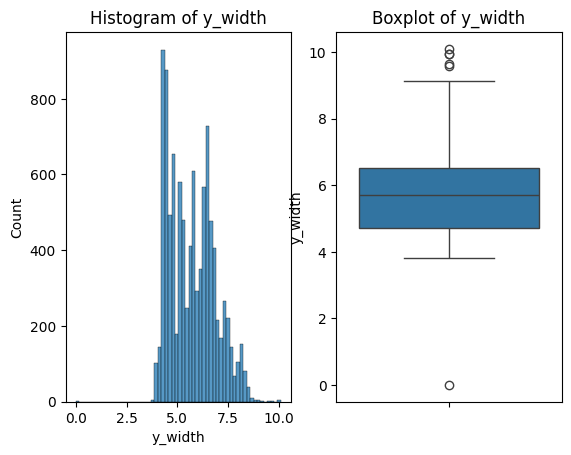

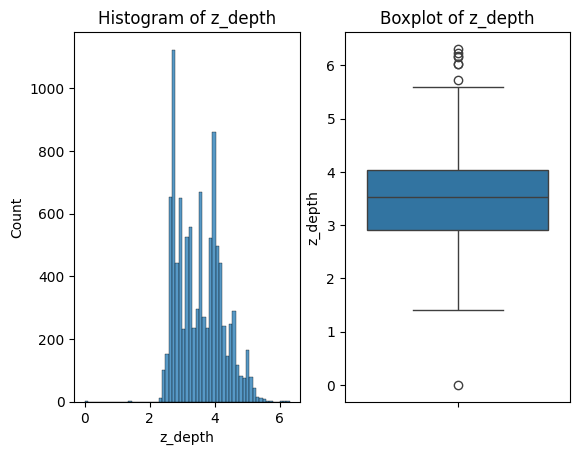

In [19]:
# plotting the histogram and box plot of the numerical columns
for i in numerica_cols:
    # plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[i])
    plt.title(f'Histogram of {i}')
    plt.subplot(1, 2, 2)
    sns.boxplot(df[i])
    plt.title(f'Boxplot of {i}')
    plt.show()
    # print(f'\n\n{df[i].describe()}')
    # print(f'\n\n{df[i].skew()}')





### 2. Comprehensive Model Evaluation

#### 2.1 Regression Model Evaluation

In [20]:
# Dictionary for regression model with their respect hyperparameters for grid search
regression_models = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {
            'fit_intercept': [True, False],
            'normalize': [True, False],
            'copy_X': [True, False],
            'n_jobs': [-1, 2, 4],
        }
    },
    'Support Vecto Regression': {
        'model': SVR(),
        'params': {
            'model_kernel': ['linear', 'poly', 'rbf', 'sigmoid']
        }
    },
    'Decision Tree Regression': {
        'model': DecisionTreeRegressor(),
        'params': {
            'model_splitter': ['best', 'random'],
            'model_max_depth': [None, 1, 2, 3]
        }
    },
    'Random Forest Regression': {
        'model': RandomForestRegressor(),
        'params': {
            'model_n_estimators': [10, 100],
            'model_max_depth': [None, 1, 2, 3]
        }
    },
    'Gradient Boosting Regression': {
        'model': GradientBoostingRegressor(),
        'params': {
            'model_n_estimators': [10, 100],
            'model_max_depth': [None, 1, 2, 3]
        }
    },
    'AdaBoost Regression': {
        'model': AdaBoostRegressor(),
        'params': {
            'model_n_estimators': [10, 100],
        }
    },
    'KNN Regression':{
        'model': KNeighborsRegressor(),
        'params': {
            'model_n_estimators': [3, 5],
        }
    },
    'XGBoost Regression':{
        'model': XGBRegressor(),
        'params': {
            'model_n_estimators': [10, 100],
            'model_max_depth': [None, 1, 2, 3],
        }
    },
    'CatBoost Regression':{
        'model': CatBoostRegressor(),
        'params':{
            'model_iterations': [10, 100],
            'model_depth': [None, 1, 2, 3],
        }
    },
    'LightGBM Regression':{
        'model': LGBMRegressor(),
        'params':{
            'model_iterations': [10],
            'model_max_depth': [None, 1, 2, 3],
            'model_learning_rate': [0.1, 0.2, 0.3],
            'model_verbose': [-1]
        }
    },
    'GaussianNB Regression':{
        'model': GaussianNB(),
        'params':{}
    },
    'BernoulliNB Regression':{
        'model': BernoulliNB(),
        'params':{}
    }
}

#### 2.1.2 Data Preparation

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1388 to 42497
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    10000 non-null  float64
 1   cut      10000 non-null  int32  
 2   color    10000 non-null  int32  
 3   clarity  10000 non-null  int32  
 4   depth    10000 non-null  float64
 5   table    10000 non-null  float64
 6   price    10000 non-null  int64  
 7   x_width  10000 non-null  float64
 8   y_width  10000 non-null  float64
 9   z_depth  10000 non-null  float64
dtypes: float64(6), int32(3), int64(1)
memory usage: 742.2 KB


In [22]:
num_cols = df.select_dtypes(include=['number']).columns.to_list()

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
num_cols = df.select_dtypes(include=['number']).columns.to_list()

#### 2.1.3 Performance Metrics

In [24]:
# initialize a list to save the model performances
model_score = []

# initialize variables to keep track of the best regressoin model
best_r2_score = -float('inf')
best_regressor = None

# iterate over the confiqured regression models
for name, model in regression_models.items():
    # create a pipeline with the specified model and hyperparameters
    pipeline = Pipeline([
        ('scaler', QuantileTransformer(random_state=42, output_distribution='normal')),
        ('model', model['model'])
        ])

    # create a grid search object to find the best hyperparameters
    grid_search = GridSearchCV(
        estimator=pipeline, 
        param_grid=model['params'], 
        cv=5, 
        scoring='neg_mean_squared_error', 
        verbose=1, 
        n_jobs=-1
        )

    # fit the grid search object on the training data
    grid_search.fit(X_train, y_train)

    y_pred = grid_search.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    # append performance metrics for the model to the list of model scores
    model_score.append({
        'Model': name,
        'MAPE': mean_absolute_percentage_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'best_params': grid_search.best_params_,
        'R2': r2
    })

    # initialize variables to keep track of the best regression model
    # check if this model has the best R2 score so for
    if r2 > best_r2_score:
        best_r2_score = r2
        best_regressor = grid_search.best_estimator_

# sort the list of model scores in descending order of R2 score
sorted_model = sorted(model_score, key=lambda x: x['Model'], reverse=True)
# convert the sorted list of model scores into a DataFrame
model_score = pd.DataFrame(sorted_model)
# identify the best model
best_reg_model = max(sorted_model, key=lambda x: x['R2'])

heading('Regression Models Performance')

# display the metrics Dataframe with rounded values for readability
# display(model_score.style.format({'MAPE': '{:.2f}', 'MAE': '{:.2f}', 'R2': '{:.2f}'}))

# print the performance metrics for each model
# for model in model_score:
#     print(f"Model: {model['Model']}")
#     print(f"MAPE: {model['MAPE']}")
#     print(f"MAE: {model['MAE']}")
#     print(f"R2_score: {model['R2_score']}")
#     print(f"Best params: {model['best_params']}")
#     print("\n")

Fitting 5 folds for each of 24 candidates, totalling 120 fits


ValueError: Invalid parameter 'copy_X' for estimator Pipeline(steps=[('scaler',
                 QuantileTransformer(output_distribution='normal',
                                     random_state=42)),
                ('model', LinearRegression())]). Valid parameters are: ['memory', 'steps', 'transform_input', 'verbose'].